**Import the libraries**

Import all the necessary libraries into the jupyter notebook:

In [ ]:
import os                              #provides functions for interacting with the operating system
import librosa                         #for music and audio analysis
import IPython.display as ipd          #kernel for jupyter
import matplotlib.pyplot as plt        #plotting library for python
import numpy as np                     #provides the n-dimensional array
from scipy.io import wavfile           #helps in data manipulation and visualisation
import warnings

warnings.filterwarnings("ignore")

#Download dataset

In [ ]:
!wget 'http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip'
!unzip mini_speech_commands.zip
!rm '/content/mini_speech_commands/README.md'

Streaming output truncated to the last 5000 lines.
  inflating: mini_speech_commands/up/1ecfb537_nohash_1.wav  
  inflating: __MACOSX/mini_speech_commands/up/._1ecfb537_nohash_1.wav  
  inflating: mini_speech_commands/up/c137814b_nohash_0.wav  
  inflating: __MACOSX/mini_speech_commands/up/._c137814b_nohash_0.wav  
  inflating: mini_speech_commands/up/135c6841_nohash_2.wav  
  inflating: __MACOSX/mini_speech_commands/up/._135c6841_nohash_2.wav  
  inflating: mini_speech_commands/up/3eb8764c_nohash_0.wav  
  inflating: __MACOSX/mini_speech_commands/up/._3eb8764c_nohash_0.wav  
  inflating: mini_speech_commands/up/caf9fceb_nohash_0.wav  
  inflating: __MACOSX/mini_speech_commands/up/._caf9fceb_nohash_0.wav  
  inflating: mini_speech_commands/up/f34e6f44_nohash_0.wav  
  inflating: __MACOSX/mini_speech_commands/up/._f34e6f44_nohash_0.wav  
  inflating: mini_speech_commands/up/61a0d340_nohash_0.wav  
  inflating: __MACOSX/mini_speech_commands/up/._61a0d340_nohash_0.wav  
  inflating: mini_

**Data Exploration and Visualization**

We will be visualizing the signal in time series domain

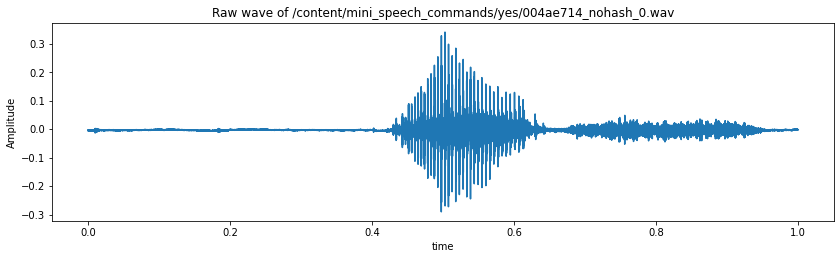

In [ ]:
train_audio_path = '/content/mini_speech_commands/'                                            #assign the path of dataset to a variable
samples, sample_rate = librosa.load(train_audio_path+'yes/004ae714_nohash_0.wav', sr = 16000)  
#load the audio file as a floating point time series and automatically resample it to the given rate-sr

fig = plt.figure(figsize=(14, 8))                                                              #plot a signal in time series domain                                               
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '/content/mini_speech_commands/yes/004ae714_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

**Sampling rate**

Print the sampling rate of a single signal:

In [ ]:
ipd.Audio(samples, rate=sample_rate)          #play the speech signal

In [ ]:
print(sample_rate)

16000


**Resampling**

Resample a single signal to 8000 hz in order to understand the change after resampling:

In [ ]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

**Number of Recordings**

In [ ]:
labels=os.listdir(train_audio_path)      #Return a list containing the name of entries in the given path

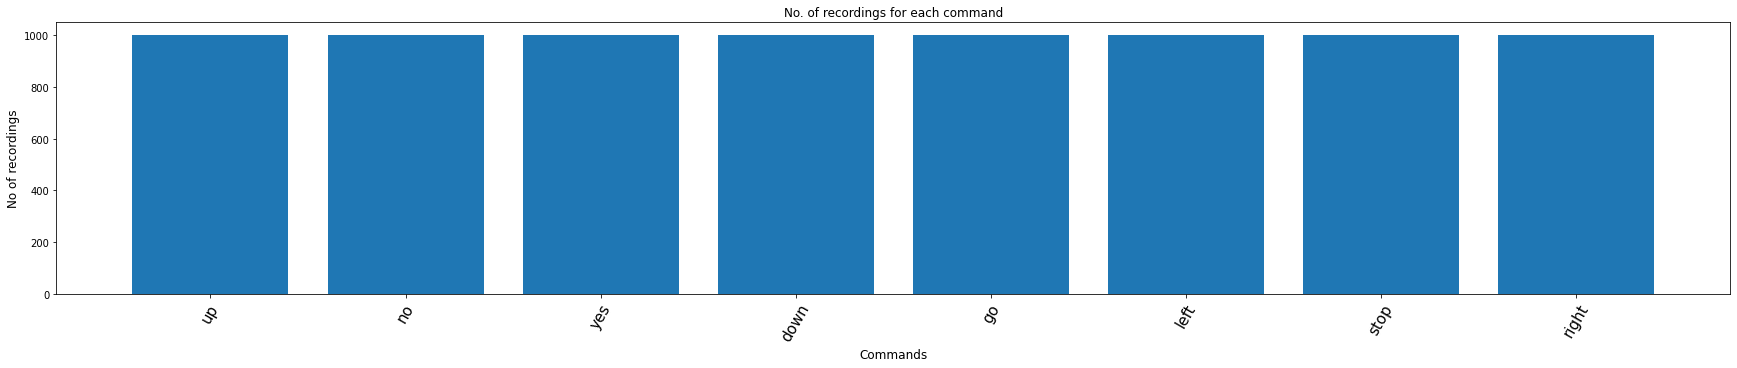

In [ ]:
#find the count of each label 
no_of_recordings=[] 
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot the bar graph
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [ ]:
labels=["yes", "no", "up", "down", "left", "right", "stop", "go"]     #labels is a list containing names of words present in the dataset 

**Duration of recordings**


(array([   8.,    8.,   19.,   39.,   47.,  108.,   91.,  143.,  211.,
        7326.]),
 array([0.4266875 , 0.48401875, 0.54135   , 0.59868125, 0.6560125 ,
        0.71334375, 0.770675  , 0.82800625, 0.8853375 , 0.94266875,
        1.        ]),
 <a list of 10 Patch objects>)

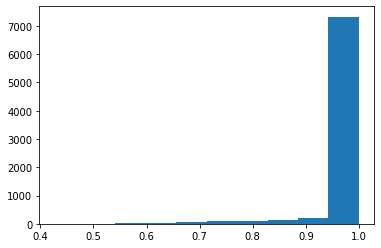

In [ ]:
duration_of_recordings=[]                                  #Create a list of duration of recordings
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))                 #Plot the histogram which displays the count of different durations of signals 

**Preprocessing the audio waves**

 Resampe all the signals present in the dataset:


In [ ]:
train_audio_path = '/content/mini_speech_commands'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)  #sample signals at the rate of 16000 Hz
        samples = librosa.resample(samples, sample_rate, 8000)                                       #resample the signals to 8000 Hz
        if(len(samples)== 8000) :                                 #create a filtered list which contains signals sampled at 8000 Hz, only   
            all_wave.append(samples)                      
            all_label.append(label)

yes
no
up
down
left
right
stop
go


Convert the output labels to integer encoded:

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                              #Encode target labels with value between 0 and n_classes-1.
y=le.fit_transform(all_label)                    #Fit label encoder and return encoded label
classes= list(le.classes_)                       #array of shape (n_class,)

Convert the integer encoded labels to a one-hot vector since it is a multi-classification problem:

In [ ]:
from keras.utils import np_utils                        #returns a matrix of binary values
y=np_utils.to_categorical(y, num_classes=len(labels))

Reshape the 2D array to 3D since the input to the conv1d must be a 3D array:

In [ ]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

**Split into train and testing set**

Train the model on 80% of the data and test on the remaining 20%:


In [ ]:
#we are using the train_test_split function for splitting data into two subsets- for training data and for testing data
#It makes random partitions for the 2 subsets

from sklearn.model_selection import train_test_split   
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

**Model Architecture**

We will build the speech-to-text model using conv1d. Conv1d is a convolutional neural network which performs the convolution along only one dimension. 

**Model building**

Implement the model using Keras functional API:

In [ ]:
#import necessary modules from keras

from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D         
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))                                                  #input dimension=8000(sampling rate)*1 

#First Conv1D layer                                                             #number of filters=8, filter length=13, 
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)      #valid padding stands for no padding, strides=1
conv = MaxPooling1D(3)(conv)                                                    #Dimension reduction to reduce the computational cost
conv = Dropout(0.3)(conv)                                                       

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer                                                                  
conv = Flatten()(conv)                                                          #Flatten the input

#Dense Layer 1                                                                  #connects neurons from one layer to another
conv = Dense(256, activation='relu')(conv)                                      # number of units = 256
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)                                      # number of units = 128
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

Define the loss function to be categorical cross-entropy since it is a multi-classification problem:

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])   #to define a loss function that calculates prediction error

Early stopping and model checkpoints are the callbacks to stop training the neural network at the right time and to save the best model after every epoch:

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001)                    #to avoid underfitting or overfitting
mc = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

Train the model on a batch size of 32 and evaluate the performance on the holdout set:

In [ ]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))      #to display the performance improvement with each epoch

Epoch 1/100
180/180 [==============================] - 3s 10ms/step - loss: 0.4435 - accuracy: 0.8397 - val_loss: 0.9968 - val_accuracy: 0.6915

Epoch 00001: val_accuracy improved from -inf to 0.69150, saving model to best_model.hdf5
Epoch 2/100
180/180 [==============================] - 1s 8ms/step - loss: 0.4404 - accuracy: 0.8501 - val_loss: 0.9465 - val_accuracy: 0.7103

Epoch 00002: val_accuracy improved from 0.69150 to 0.71031, saving model to best_model.hdf5
Epoch 3/100
180/180 [==============================] - 2s 8ms/step - loss: 0.3978 - accuracy: 0.8634 - val_loss: 0.8835 - val_accuracy: 0.7242

Epoch 00003: val_accuracy improved from 0.71031 to 0.72423, saving model to best_model.hdf5
Epoch 4/100
180/180 [==============================] - 1s 8ms/step - loss: 0.3943 - accuracy: 0.8649 - val_loss: 0.9481 - val_accuracy: 0.7221

Epoch 00004: val_accuracy did not improve from 0.72423
Epoch 5/100
180/180 [==============================] - 1s 8ms/step - loss: 0.3931 - accuracy: 0

**Diagnostic plot**

To understand the performance of the model over a period of time:

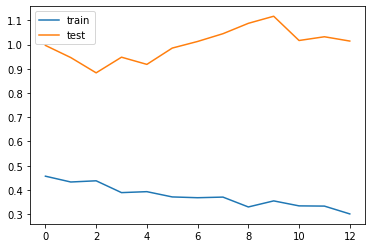

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**Load the best model**

In [ ]:
from keras.models import load_model       
model=load_model('best_model.hdf5')         #Loads the best model, which is at 39 epochs

Define the function that predicts text for the given audio:

In [ ]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])                        
    return classes[index]

Make predictions on the validation data:

In [ ]:
import random                                        #to generate pseudo-random variables
index=random.randint(0,len(x_val)-1)                 #random variable is stored in index 
samples=x_val[index].ravel()                         
print("Audio:",classes[np.argmax(y_val[index])])     #plays a random audio from the dataset
ipd.Audio(samples, rate=8000)

Audio: yes


**Final Output**

In [ ]:
print("Text:",predict(samples))                      #generates the final speech to text output

Text: yes


And we have successfully built our very own Speech to Text Conversion Model using Convolutional Neural Networks!!